# Episode 20 — Optimize for Target Hardware

In this notebook, we introduce how to prepare and optimize quantum circuits for specific quantum hardware using Qiskit's transpiler stack.

## 1. Introduction
The goal of this step in the Qiskit pattern is to take **abstract circuits** produced from the mapping step and transform them into **ISA circuits** — circuits that are compatible with a given hardware backend's basis gates and connectivity.

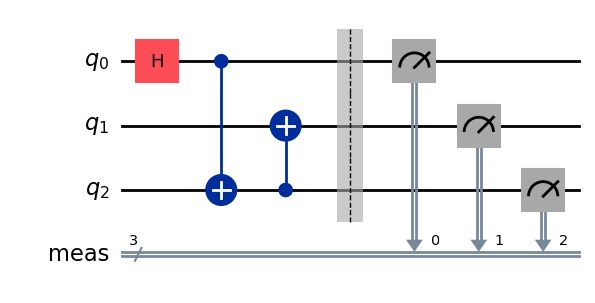

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

# Create an abstract circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 2)
qc.cx(2, 1)
qc.measure_all()

qc.draw('mpl')

## 2. Choosing a target backend
We use a **fake backend** to simulate the transpilation process for a specific device.

In [4]:
# Fake backend to represent a real IBM Quantum device
backend = FakeManilaV2()
print("Basis gates:", backend.configuration().basis_gates)
print("Coupling map:", backend.configuration().coupling_map)

Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
Coupling map: [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]


## 3. Transpilation basics
We use `transpile()` to convert the abstract circuit to an ISA circuit compatible with the backend.

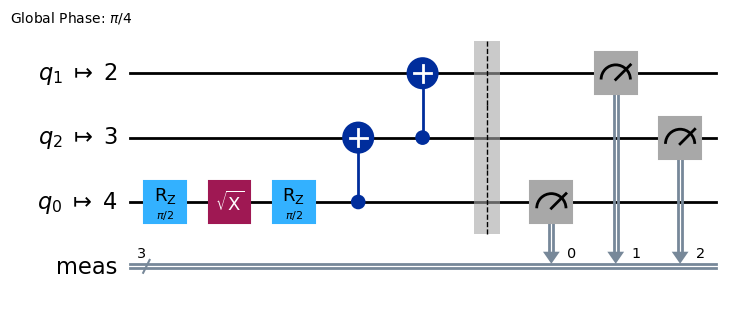

In [5]:
# Transpile with optimization level 1
transpiled_qc = transpile(qc, backend=backend, optimization_level=1)
transpiled_qc.draw('mpl')

## 4. Transpilation stages overview
Qiskit's transpiler has **six main stages**:
- **init**: prepare the circuit, unroll custom gates
- **layout**: map virtual qubits to physical qubits
- **routing**: insert SWAPs to satisfy connectivity
- **translation**: convert to basis gates
- **optimization**: reduce gate depth and count
- **scheduling**: optimize execution timing

## 5. PassManager example
You can manually build transpilation flows with a **PassManager** or **StagedPassManager** to control the optimization process in detail.

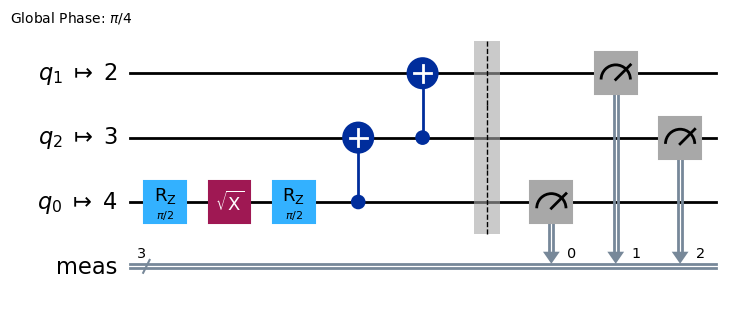

In [6]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Generate a preset pass manager for level 2 optimization
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)

# Run the pass manager on the circuit
optimized_qc = pm.run(qc)
optimized_qc.draw('mpl')

## 6. Qiskit addons and functions for optimization
Some advanced tools include:
- **AQC-Tensor** for approximate quantum compilation
- **Operator backpropagation** for expectation value improvement
- **Circuit cutting** for decomposing large circuits
- **IBM Circuit Function** for automated transpilation in cloud workflows

These will be explored in advanced optimization episodes.

## Additional information

**Created by:** Ricard Santiago Raigada García

**Version:** 1.0.0